# Feature Scaling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate some random feature

In [14]:
!uv pip install scikit-learn -q

In [89]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [77]:
np.random.seed(0)  # Seed for reproducibility
# Create two independent random features with 10 rows
feature_a = np.random.randn(10)  # Feature with random values from a standard normal distribution
feature_b = np.random.randn(10) * 1e3  # Feature with random values from a normal distribution scaled by 1e3

# Combine the features into a single dataset
data_2d = np.column_stack((feature_a, feature_b))
print(data_2d)

[[ 1.76405235e+00  1.44043571e+02]
 [ 4.00157208e-01  1.45427351e+03]
 [ 9.78737984e-01  7.61037725e+02]
 [ 2.24089320e+00  1.21675016e+02]
 [ 1.86755799e+00  4.43863233e+02]
 [-9.77277880e-01  3.33674327e+02]
 [ 9.50088418e-01  1.49407907e+03]
 [-1.51357208e-01 -2.05158264e+02]
 [-1.03218852e-01  3.13067702e+02]
 [ 4.10598502e-01 -8.54095739e+02]]


In [90]:
# default_scaler = MinMaxScaler()
# default_scaler = StandardScaler()
default_scaler = RobustScaler() # Use this to avoid being affected by outliers
fit_data = default_scaler.fit(data_2d)
transform_data = default_scaler.transform(data_2d)
transform_data

array([[ 0.70138494, -0.32341731],
       [-0.18133875,  2.03958433],
       [ 0.19312329,  0.78933256],
       [ 1.0100001 , -0.36375903],
       [ 0.76837461,  0.2173079 ],
       [-1.07282561,  0.01858204],
       [ 0.17458107,  2.11137373],
       [-0.53828323, -0.95320334],
       [-0.50712771, -0.01858204],
       [-0.17458107, -2.12356305]])

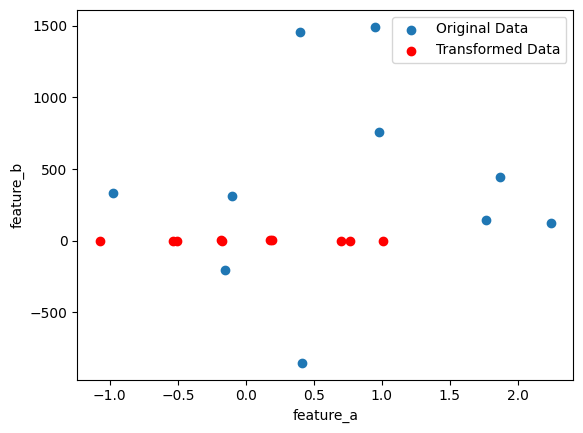

In [91]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], label="Original Data")
plt.scatter(
    transform_data[:, 0], transform_data[:, 1], label="Transformed Data", color="red"
)

plt.xlabel("feature_a")
plt.ylabel("feature_b")
plt.legend()

## Normalization

The above scaling is done to the features (columns), but sometimes, scaling needs to be done to the individual data as well (rows). L2 Normalization is used in those cases, it is nothing much the square root of the sum of the squared values for that row.

X=[x1, x2,...,xm]

XL2 = [x1/ℓ, x2/ℓ, ....., xm/ℓ], where ℓ = Sq.root(i=1 to m ∑xi**2)

In [96]:
data = np.array([[2000,  900,  100,  700],
 [900,  410,   39,  344],
 [1232,  560,   67,  400],
 [4012, 2032,  199, 1512]])
data

array([[2000,  900,  100,  700],
       [ 900,  410,   39,  344],
       [1232,  560,   67,  400],
       [4012, 2032,  199, 1512]])

In [97]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
transformed = normalizer.fit_transform(data)
print(f"{transformed}")

[[0.86792607 0.39056673 0.0433963  0.30377413]
 [0.85891432 0.39128319 0.03721962 0.32829614]
 [0.87204702 0.39638501 0.04742464 0.28313215]
 [0.84484854 0.42789936 0.0419055  0.31839756]]


## What about missing features? (NaN)

Often times, the dataset may have some missing data, there are different ways to fill those in in scikit learn:

In scikit-learn, the `SimpleImputer` transformer performs four different data imputation methods.

The four methods are:  
- Using the mean value
- Using the median value
- Using the most frequent value
- Filling in missing values with a constant  

Advanced imputation methods such as k-Nearest Neighbors (filling in missing values based on similarity scores from the kNN algorithm) and MICE (applying multiple chained imputations, assuming the missing values are randomly distributed across observations).

In [100]:
data = np.array(
    [
        [1.0, 2.0, np.nan, 2.0],
        [5.0, np.nan, 1.0, 2.0],
        [4.0, np.nan, 3.0, np.nan],
        [5.0, 6.0, 8.0, 1.0],
        [np.nan, 7.0, np.nan, 0.0],
    ]
)
data

array([[ 1.,  2., nan,  2.],
       [ 5., nan,  1.,  2.],
       [ 4., nan,  3., nan],
       [ 5.,  6.,  8.,  1.],
       [nan,  7., nan,  0.]])

In [102]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer()
transformed = imp_mean.fit_transform(data) # always prefer to use fit() and then transform() to avoid data leakage. And its easy to apply the same transformation to new data in test set as we don't want to fit the model on test set (or update the weights of the model)

imp_median = SimpleImputer(strategy='median')
print(transformed)

[[1.   2.   4.   2.  ]
 [5.   5.   1.   2.  ]
 [4.   5.   3.   1.25]
 [5.   6.   8.   1.  ]
 [3.75 7.   4.   0.  ]]


In [103]:
# predefined data
print("{}\n".format(repr(data)))

imp_median = SimpleImputer(strategy="median")
transformed = imp_median.fit_transform(data)
print("{}\n".format(repr(transformed)))

imp_frequent = SimpleImputer(strategy="most_frequent")
transformed = imp_frequent.fit_transform(data)
print("{}\n".format(repr(transformed)))

array([[ 1.,  2., nan,  2.],
       [ 5., nan,  1.,  2.],
       [ 4., nan,  3., nan],
       [ 5.,  6.,  8.,  1.],
       [nan,  7., nan,  0.]])

array([[1. , 2. , 3. , 2. ],
       [5. , 6. , 1. , 2. ],
       [4. , 6. , 3. , 1.5],
       [5. , 6. , 8. , 1. ],
       [4.5, 7. , 3. , 0. ]])

array([[1., 2., 1., 2.],
       [5., 2., 1., 2.],
       [4., 2., 3., 2.],
       [5., 6., 8., 1.],
       [5., 7., 1., 0.]])

